In [1]:
import loompy
import scvelo as scv

In [3]:
import pandas as pd

In [5]:
import session_info 
session_info.show()

In [6]:
files = ["cellranger_SRR12765139.loom","cellranger_SRR12765140.loom","cellranger_SRR12765141.loom","cellranger_SRR12765144.loom"]

In [7]:
loompy.combine(files, "GSE167493_E80_E105.loom", key="Accession")

In [9]:
scv.settings.verbosity = 3 # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True # set max width size for presenter view
scv.set_figure_params('scvelo') # for beautified visualization

In [11]:
adata = scv.read("GSE167493_E80-105_npcs20.h5ad", cache=True)
Idata = scv.read("GSE167493_E80_E105.loom", cache=True)
mdata = scv.utils.merge(adata, Idata)

In [12]:
adata

AnnData object with n_obs × n_vars = 2072 × 20790
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'integrated_snn_res.0.5', 'integrated_snn_res.0.6', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'seurat_clusters', 'Embryonic day', 'sample_batch'
    var: 'features'
    obsm: 'X_umap'

In [13]:
mdata

AnnData object with n_obs × n_vars = 1811 × 20776
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'CC.Difference', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'integrated_snn_res.0.5', 'integrated_snn_res.0.6', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'seurat_clusters', 'Embryonic day', 'sample_batch', 'Clusters', '_X', '_Y', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
    var: 'features', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

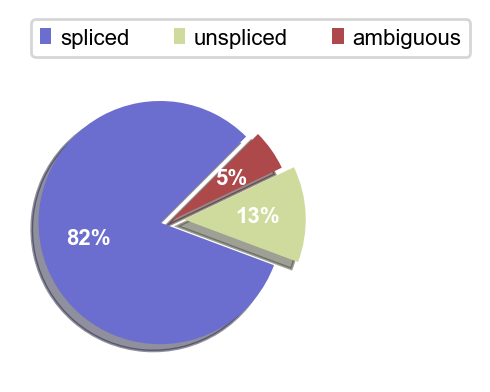

In [14]:
scv.pl.proportions(mdata)

In [15]:
scv.pp.filter_and_normalize(mdata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(mdata,n_pcs=30, n_neighbors=30)

Filtered out 12874 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\preprocessing\utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
C:\Users\souta\AppData\Local\Temp\ipykernel_26384\2365343949.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(mdata,n_pcs=30, n_neighbors=30)
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\preprocessing\moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\preprocessing\neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. 

computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [16]:
scv.tl.velocity(mdata)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\tools\optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


In [17]:
scv.tl.velocity_graph(mdata)

C:\Users\souta\anaconda3\Lib\site-packages\ipywidgets\widgets\widget.py:438: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  self.comm = Comm(**args)


computing velocity graph (using 1/22 cores)


  0%|          | 0/1811 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

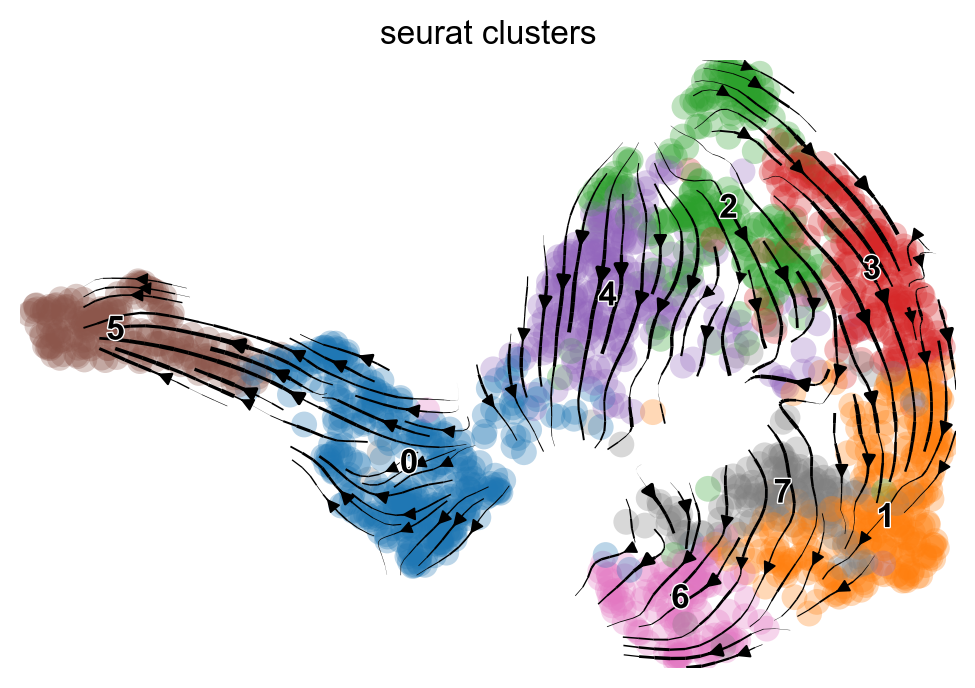

In [18]:
scv.pl.velocity_embedding_stream(mdata, basis="umap",color="seurat_clusters")

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

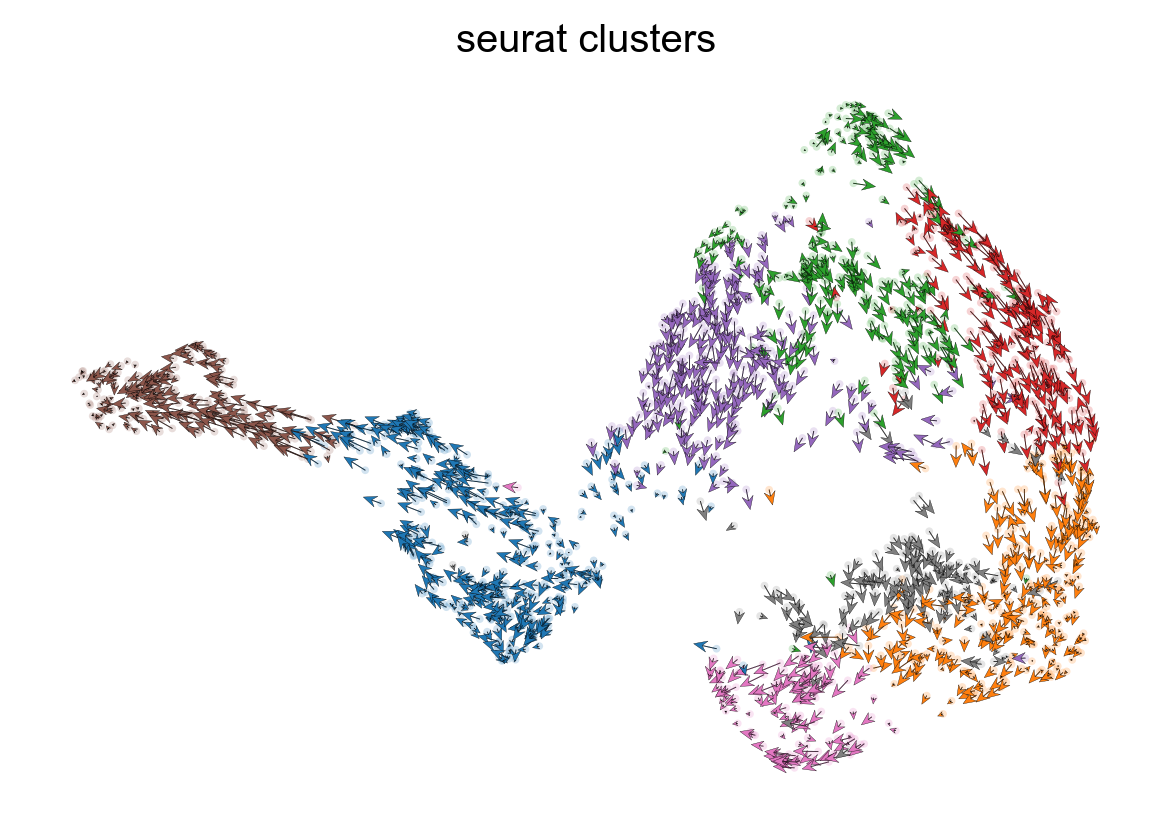

In [19]:
scv.pl.velocity_embedding(mdata, arrow_length=3, arrow_size=2, dpi=120, color="seurat_clusters")

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

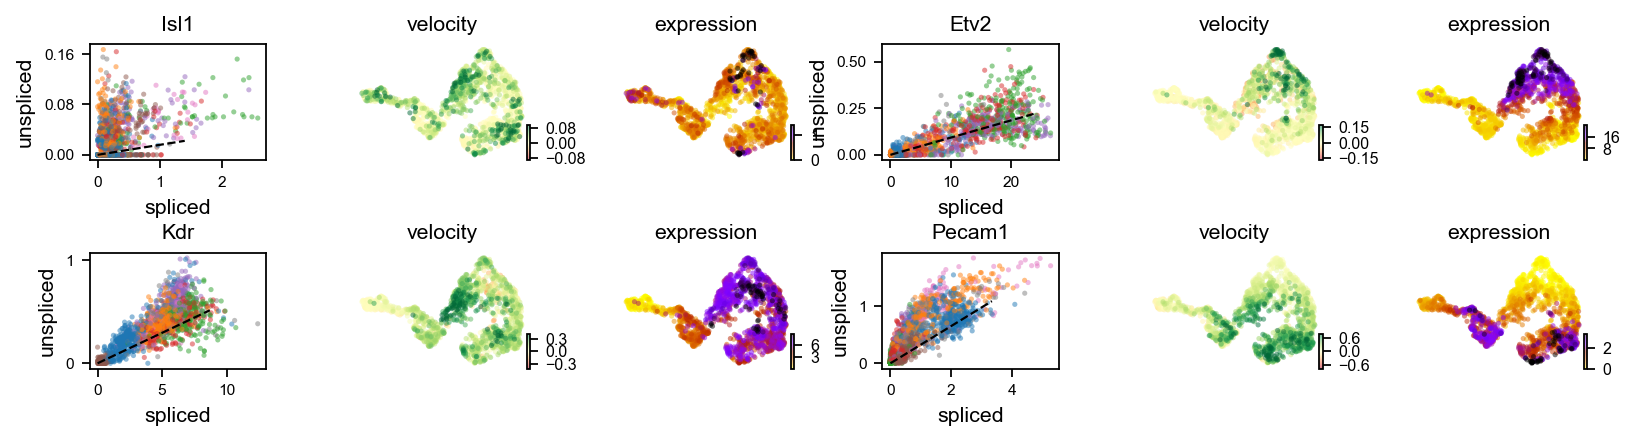

In [20]:
#Interprete the velocities
scv.pl.velocity(mdata, ["Isl1",  "Etv2", "Kdr", "Pecam1"], ncols=2, color="seurat_clusters")

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

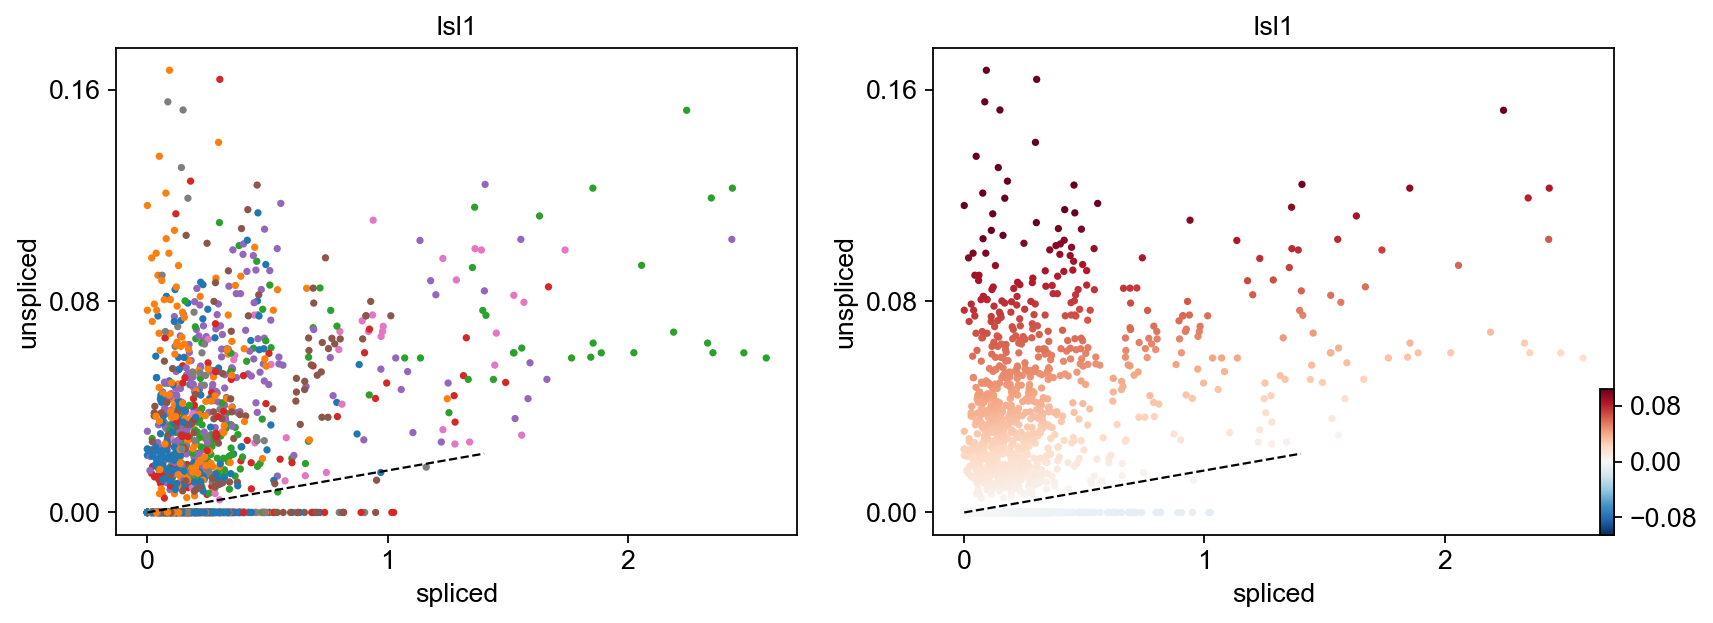

In [21]:
scv.pl.scatter(mdata, "Isl1", color=["seurat_clusters", "velocity"])

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

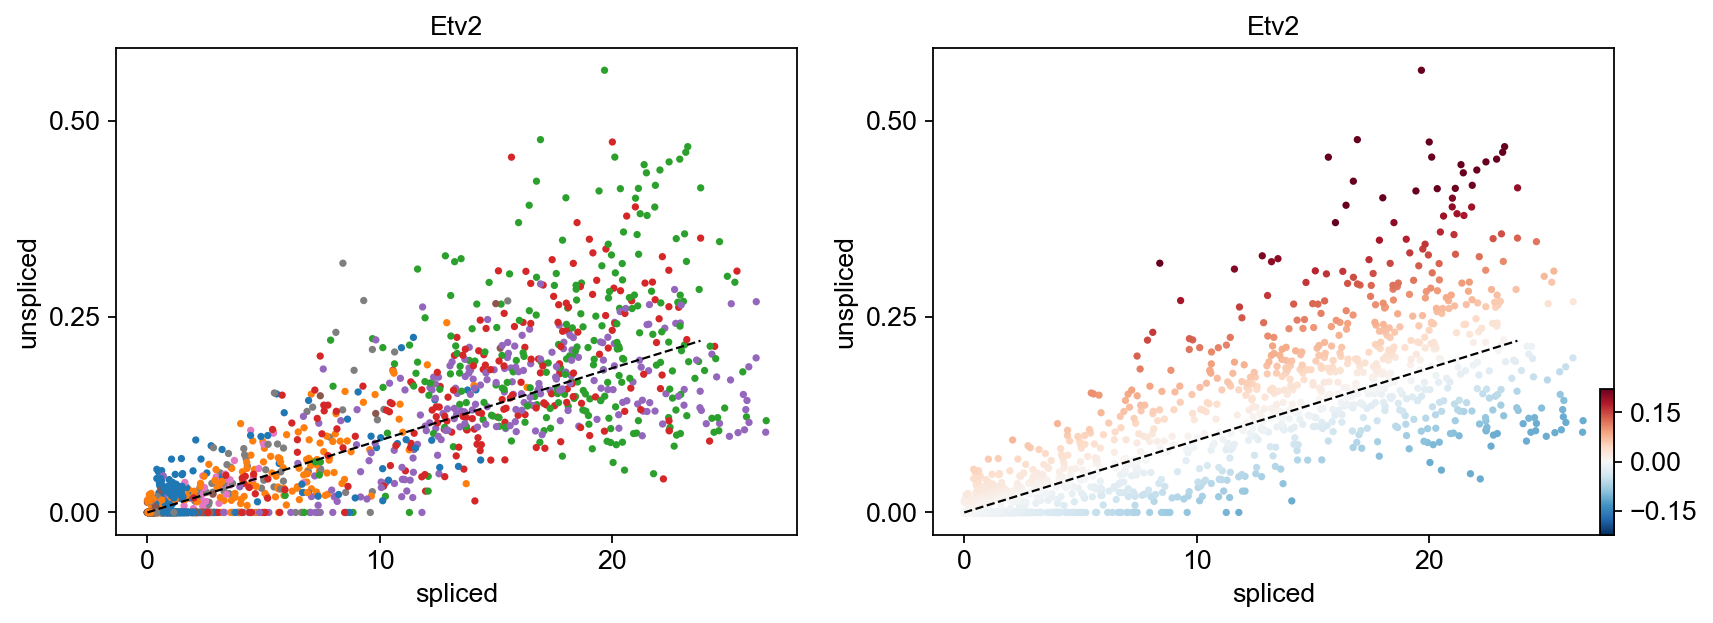

In [22]:
scv.pl.scatter(mdata, "Etv2", color=["seurat_clusters", "velocity"])

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

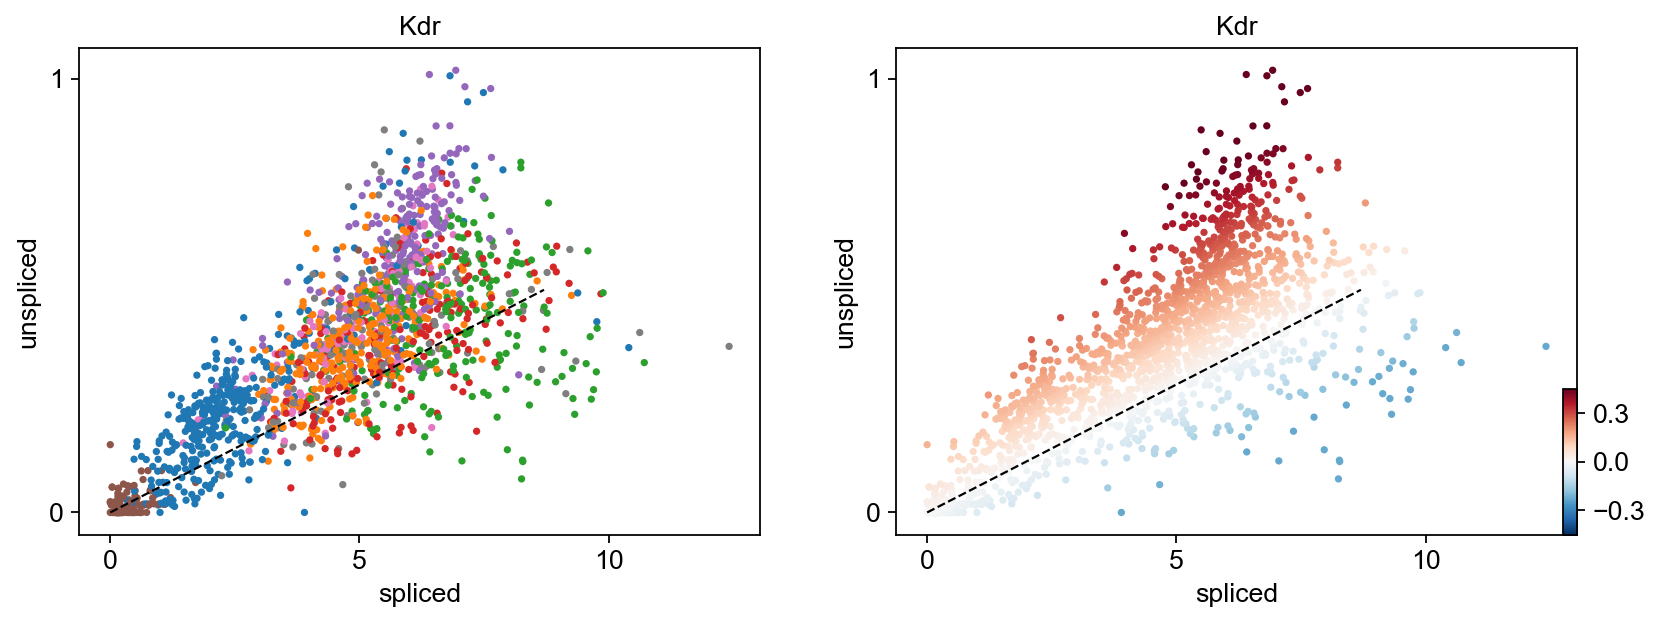

In [23]:
scv.pl.scatter(mdata, "Kdr", color=["seurat_clusters", "velocity"])

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

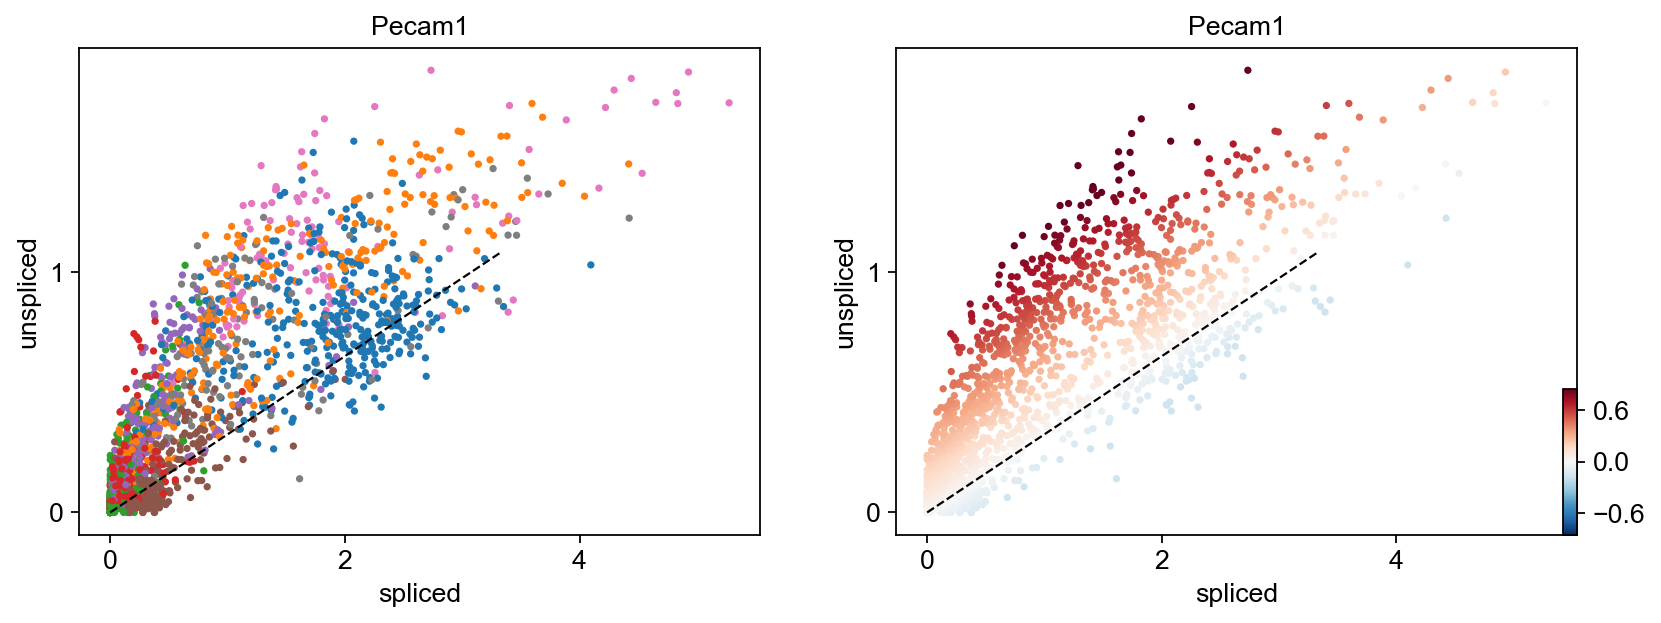

In [24]:
scv.pl.scatter(mdata, "Pecam1", color=["seurat_clusters", "velocity"])

In [25]:
#Identify important genes
scv.tl.rank_velocity_genes(mdata, groupby="seurat_clusters", min_corr=.3)
df = pd.DataFrame(mdata.uns["rank_velocity_genes"]["names"])
df.to_csv("./rank_velocity_genes.csv")
df.head()

ranking velocity genes


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\tools\utils.py:463: DeprecationWarning: Please use `rankdata` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import rankdata


    finished (0:00:01) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


0        1        2        3      4              5        6       7
0    Itpr2    Mef2c     Lmo2     Lcp1   Tbx3  2610035D17Rik  Plekhg1    Actb
1     Lmo7  Plekhg1  Col13a1  Rasgrp3  Hoxa9         Pdgfra     Nos3   Itga2
2  Rps6ka2    Aplnr   Tspan5  Zdhhc14    Fn1          Pde7b    Klhl4  Zfp608
3    Nrxn3    Peak1  Fam162a  Colec12  Morc4          Fgfr2    Atxn1  Limch1
4    Lrig1    Vamp5  Colec12   Hapln1   Jag1          Itgb5  Morrbid    Tcf4

C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

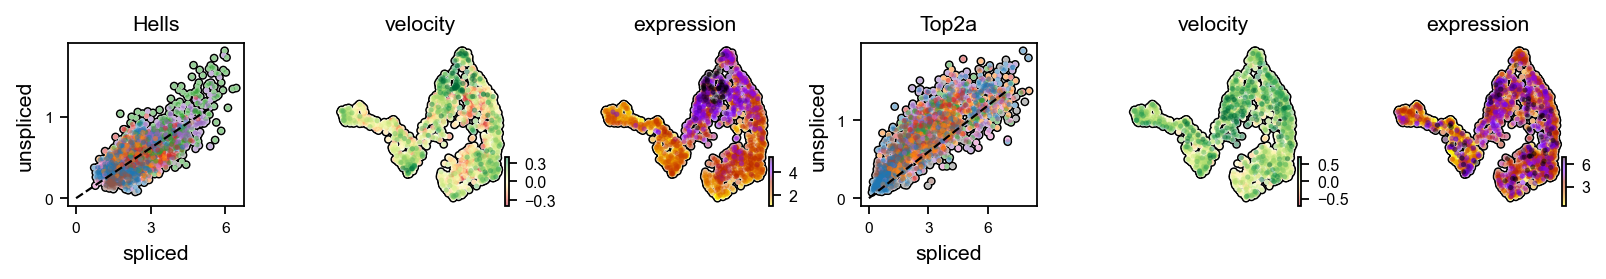

In [26]:
scv.pl.velocity(mdata, ["Hells", "Top2a"], ncols=2, add_outline=True, color="seurat_clusters")

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

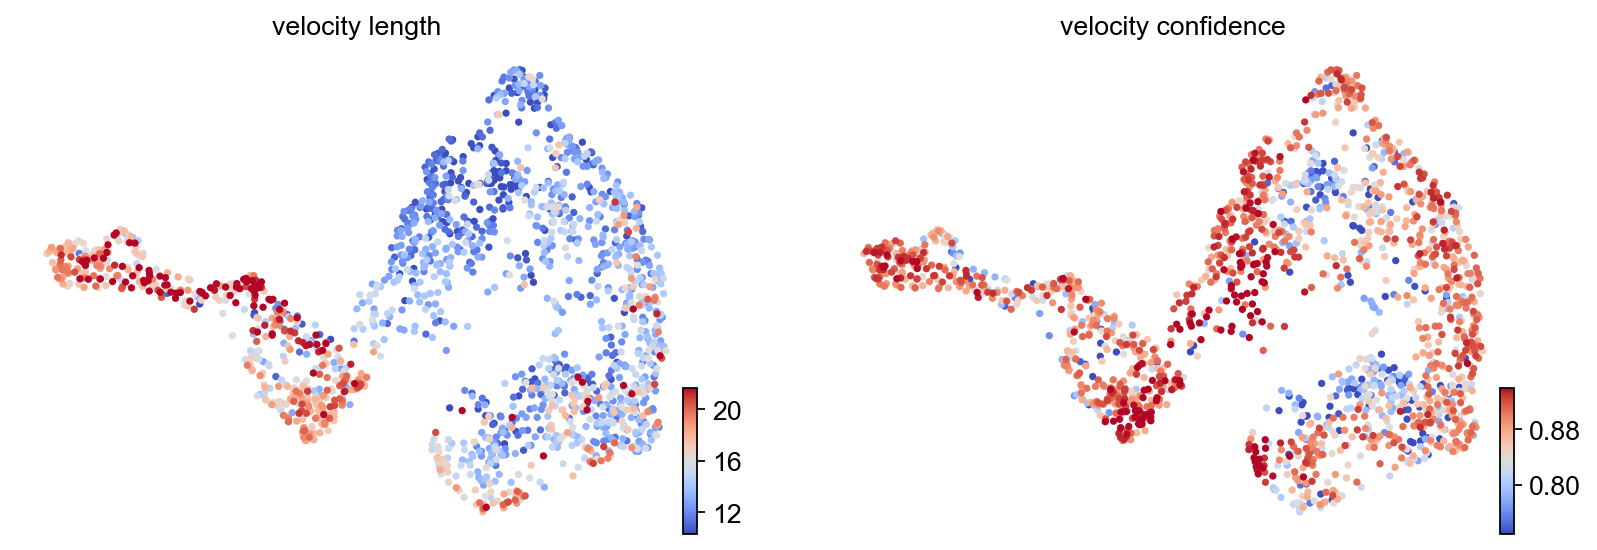

In [27]:
#Speed and coherence
scv.tl.velocity_confidence(mdata)
keys = "velocity_length", "velocity_confidence"
scv.pl.scatter(mdata, c=keys, cmap='coolwarm', perc=[5, 95])

In [28]:
df = mdata.obs.groupby("seurat_clusters")
df_L = df["velocity_length"].mean()
df_C = df["velocity_confidence"].mean()
df = pd.merge(df_L, df_C, on="seurat_clusters", how="inner")
df = df.T
df.style.background_gradient(cmap="coolwarm", axis=1)

computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

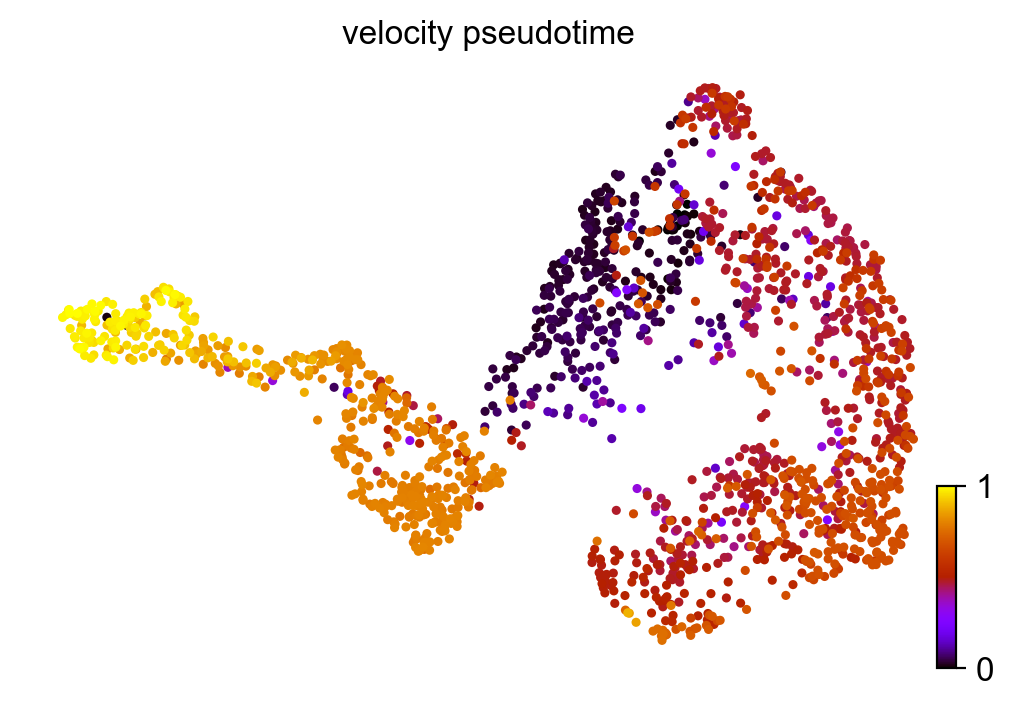

In [29]:
scv.tl.velocity_pseudotime(mdata)
scv.pl.scatter(mdata, color="velocity_pseudotime", cmap="gnuplot")

In [30]:
# PAGA requires to install igraph, if not done yet.
!pip install python-igraph --upgrade --quiet

In [31]:
mdata.uns["neighbors"]["distances"] = mdata.obsp["distances"]
mdata.uns["neighbors"]["connectivities"] = mdata.obsp["connectivities"]

scv.tl.paga(mdata, groups="seurat_clusters")
df = scv.get_df(mdata, "paga/transitions_confidence", precision=2).T
df.style.background_gradient(cmap="Blues").format("{:.2g}")

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


C:\Users\souta\AppData\Local\Temp\ipykernel_26384\2706338546.py:5: DeprecationWarning: `get_df` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please `AnnData::get_df` or Scanpy's `scanpy.get.obs_df` or `scanpy.get.var_df`.
  df = scv.get_df(mdata, "paga/transitions_confidence", precision=2).T
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\core\_anndata.py:257: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if is_categorical_dtype(data.obs[key])


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

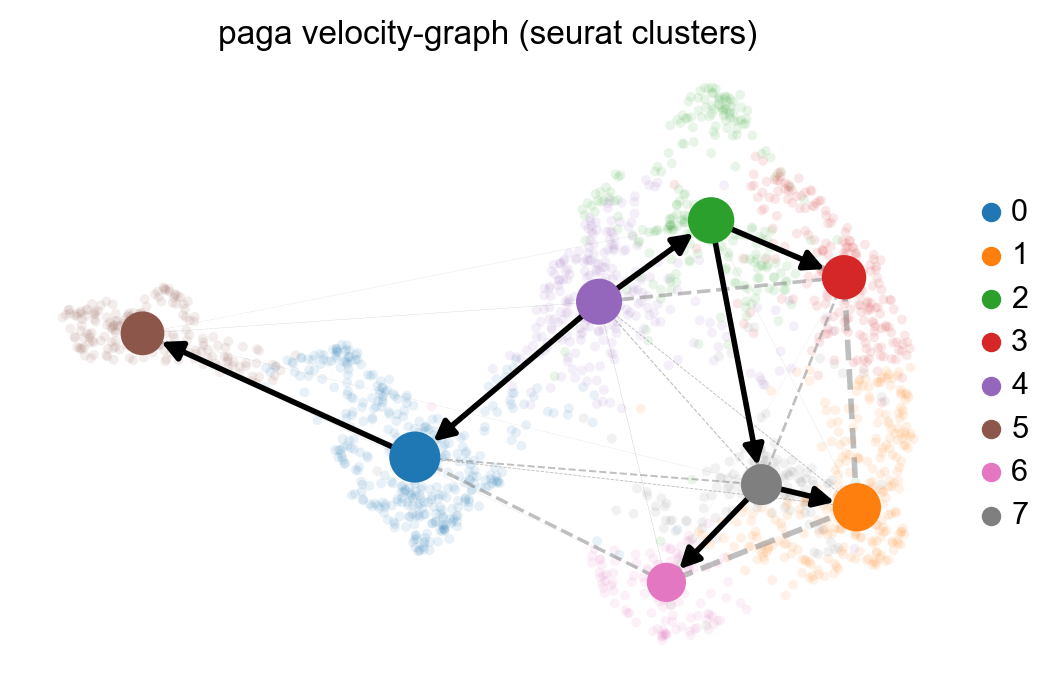

In [32]:
scv.pl.paga(mdata, basis="umap", size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [33]:
mdata_20240616_2000 = mdata
%store mdata_20240616_2000

Stored 'mdata_20240616_2000' (AnnData)


In [34]:
%store

Stored variables and their in-db values:
mdata_20240616                  -> AnnData object with n_obs × n_vars = 1811 × 2000
 
mdata_20240616_2000             -> AnnData object with n_obs × n_vars = 1811 × 2000
 
mdata_20240616_3000             -> AnnData object with n_obs × n_vars = 1811 × 3000
 


C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
C:\Users\souta\anaconda3\Lib\site-packages\scvelo\plotting\utils.py:63: DeprecationWarning: is_categorical_dtype is depre

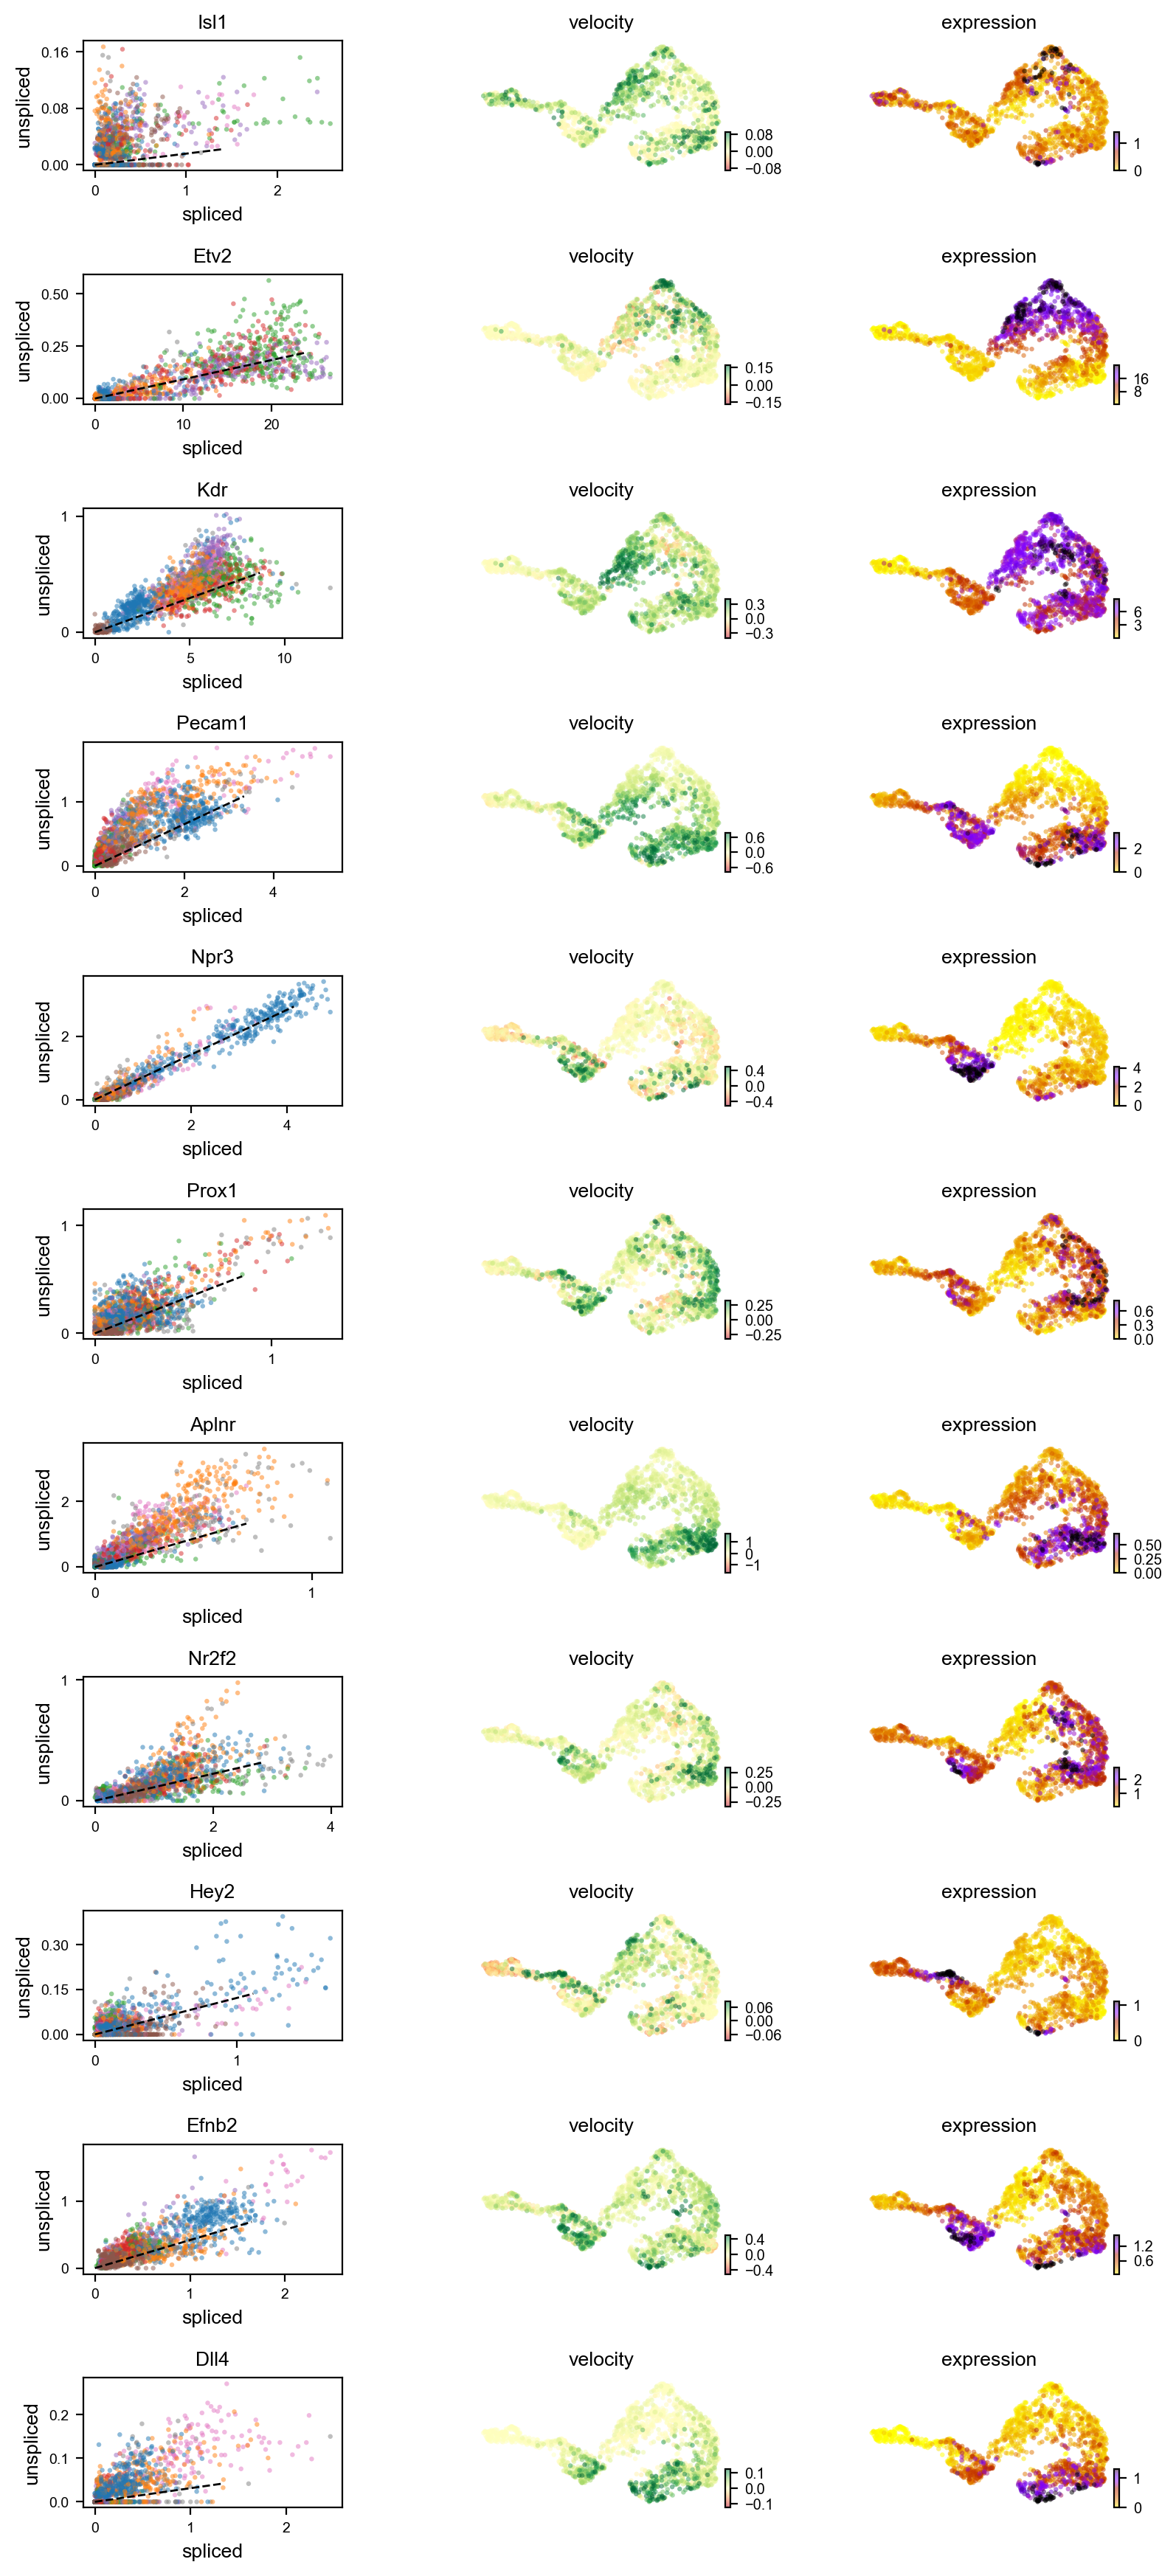

In [64]:
scv.pl.velocity(mdata, ["Isl1","Etv2","Kdr","Pecam1","Npr3","Prox1","Aplnr","Nr2f2","Hey2","Efnb2","Dll4"], ncols=1, color="seurat_clusters")